In [77]:
import torch
from torch.nn import MSELoss, Sequential, Linear, Sigmoid, Tanh, L1Loss, Module, Parameter, NLLLoss
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize_scalar
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import log_loss
from numpy.random import default_rng
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [78]:
f = open("Lecture2/spam.train.txt", "r")
txt = f.read()
sp = re.split(r'[\n]', txt)
li = list(map(lambda x:re.split(r'[ \n]', x), sp ))
li = li[:-1]
doto = list()
for a in li:
    for t in a:
        doto.append(float(t))
doto2 = np.array(doto).reshape(len(li), -1)

In [79]:
f = open("Lecture2/spam.test.txt", "r")
txt = f.read()
sp = re.split(r'[\n]', txt)
li = list(map(lambda x:re.split(r'[ \n]', x), sp ))
li = li[:-1]
doto = list()
for a in li:
    for t in a:
        doto.append(float(t))
dototest = np.array(doto).reshape(len(li), -1)

torch.Size([7093, 102])
torch.Size([7093])


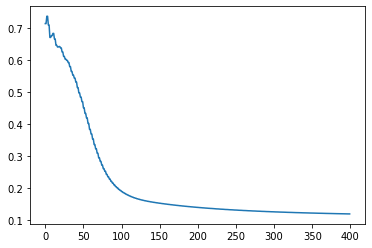

In [80]:

network = Sequential(Linear(102, 50), Sigmoid(),
          Linear(50, 2),  torch.nn.LogSoftmax())
Loss = NLLLoss()
learning_rate = 0.01
X_train = torch.from_numpy(doto2[:,1::]).float()
print(X_train.size())
y_train = torch.from_numpy(doto2[:,0].reshape(-1,1)).long().squeeze()
print(y_train.size())

optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
losses = []
for i in range(200):
    network.zero_grad()
    res = network(X_train)
    los_val = Loss(res, y_train)
    losses.append(los_val)
    los_val.backward()
    optimizer.step()

    losses.append(los_val)
plt.plot(losses)

In [81]:
X_train = doto2[:,1::]
y_train = doto2[:,0].reshape(-1,1)
X_test = dototest[:,1::]
y_test = dototest[:,0].reshape(-1,1)

In [82]:
network_res = f1_score(np.argmax(network(torch.from_numpy(doto2[:,1::]).float()).detach().numpy(), axis = 1), y_train)

In [83]:
svm = SVC()
svm.fit(X_train, y_train)
svm_res = f1_score(svm.predict(X_test),y_test)

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_res = f1_score(logreg.predict(X_test),y_test)

In [85]:
svm_res

0.9585241566148487

In [86]:
network_res

0.9605517909002904

In [87]:
logreg_res

0.935693215339233

In [88]:
def plot_graphic(estimator_class, name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(50, 760, 100):
        if name != 'RF':
            estimator = estimator_class(n_estimators = i, learning_rate = 0.01)
        else:
            estimator = estimator_class(n_estimators = i) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Estimator number')
    ax.set_title(name)
    ax.plot(range(50, 760, 100), losses)

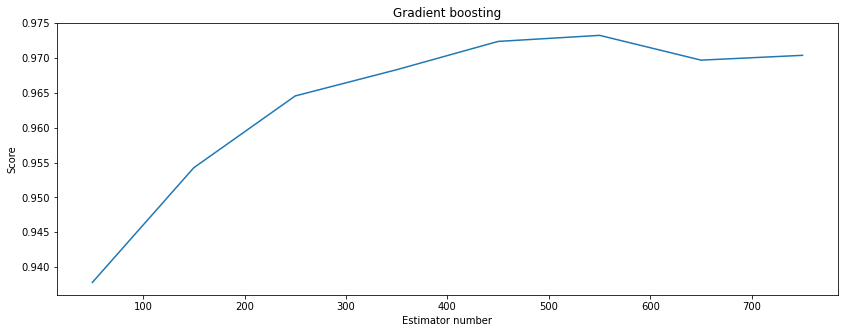

In [89]:
plot_graphic(GradientBoostingClassifier, 'Gradient boosting', X_train, y_train, X_test, y_test)

In [90]:
estimator = GradientBoostingClassifier(n_estimators = 550)
estimator.fit(X_train, y_train)
boost_score = f1_score(estimator.predict(X_test), y_test)

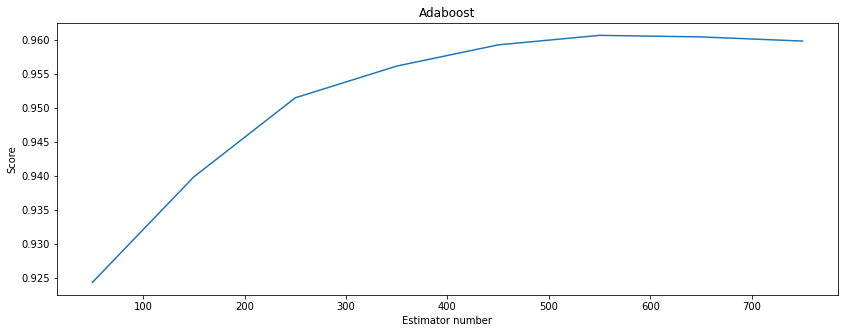

In [91]:
plot_graphic(AdaBoostClassifier, 'Adaboost', X_train, y_train, X_test, y_test)

In [92]:
estimator = AdaBoostClassifier(n_estimators = 550, learning_rate = 0.01)
estimator.fit(X_train, y_train)
ada_score = f1_score(estimator.predict(X_test), y_test)

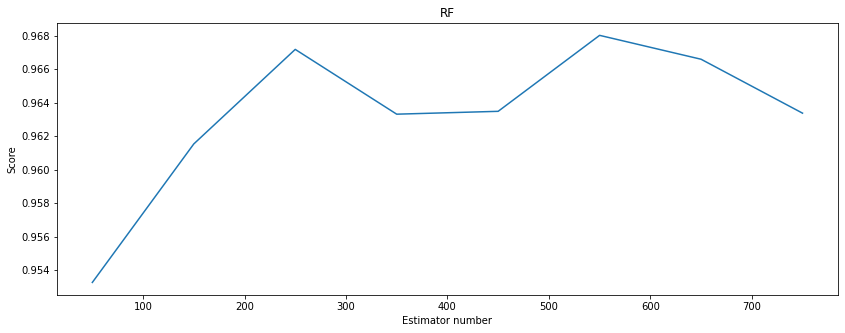

In [93]:
plot_graphic(RandomForestClassifier, 'RF', X_train, y_train, X_test, y_test)

In [94]:
estimator = RandomForestClassifier(n_estimators = 600)
estimator.fit(X_train, y_train)
rf_score = f1_score(estimator.predict(X_test), y_test)

In [95]:
import xgboost as xgb

In [96]:
import catboost as yan

In [97]:
import lightgbm as lgb

In [123]:
import numpy as np

In [98]:
def plot_graphic1(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(50, 760, 100):
        params['n_estimators'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Estimator number')
    ax.set_title(name)
    ax.plot(range(50, 760, 100), losses)

In [113]:
def plot_graphic2(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(1, 10, 2):
        params['max_depth'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Depth')
    ax.set_title(name)
    ax.plot( range(1, 10, 2), losses)

In [126]:
def plot_graphic3(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in np.arange(0.01, 0.5, 0.05):
        params['learning_rate'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Learning_rate')
    ax.set_title(name)
    ax.plot(np.arange(0.01, 0.5, 0.05), losses)

In [99]:
param = {
         'max_depth': 5, 'learning_rate': 0.1,
        
         }

In [134]:
param2 = {
         'max_depth': 5, 'learning_rate': 0.1,
         'num_leaves':2**5
         }

In [100]:
param1 = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.1,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}

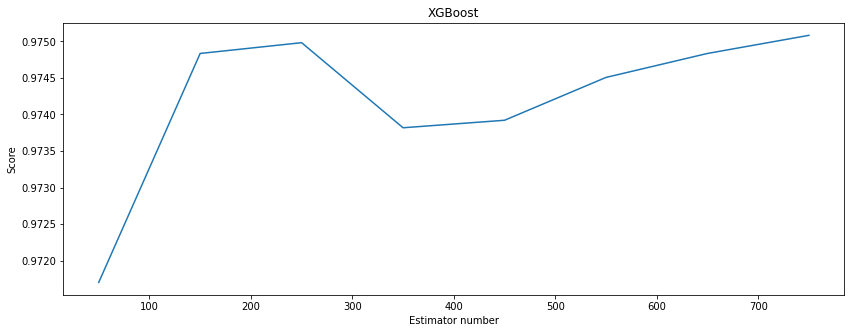

In [101]:
plot_graphic1(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

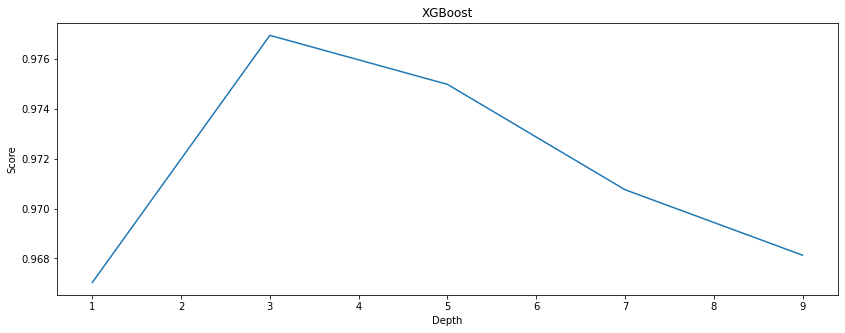

In [116]:
plot_graphic2(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

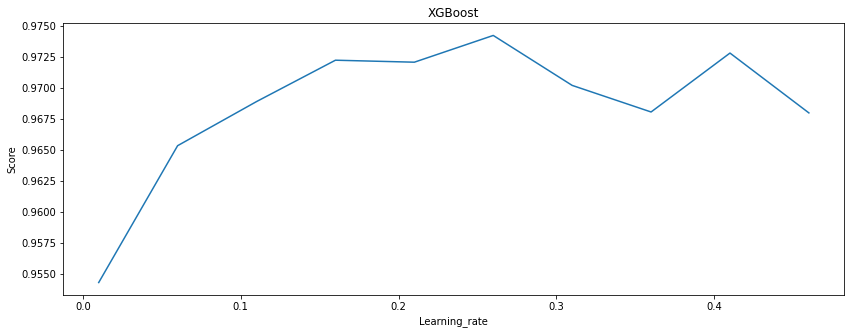

In [127]:
plot_graphic3(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

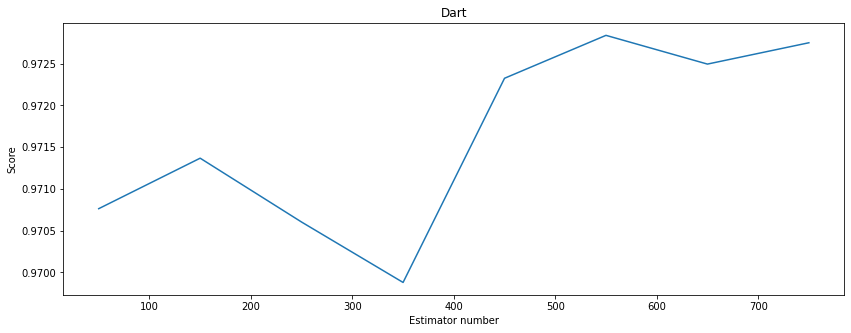

In [102]:
plot_graphic1(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

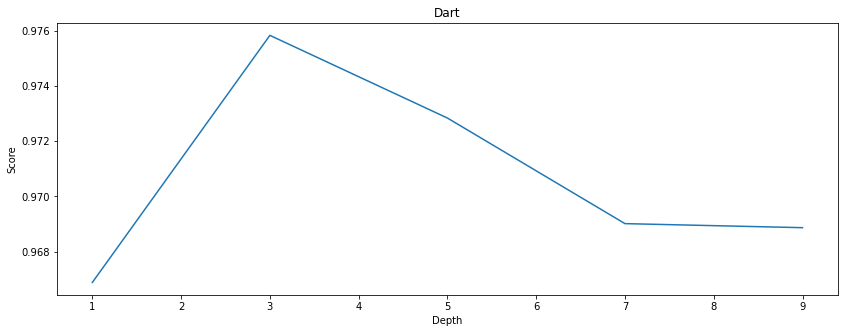

In [128]:
plot_graphic2(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

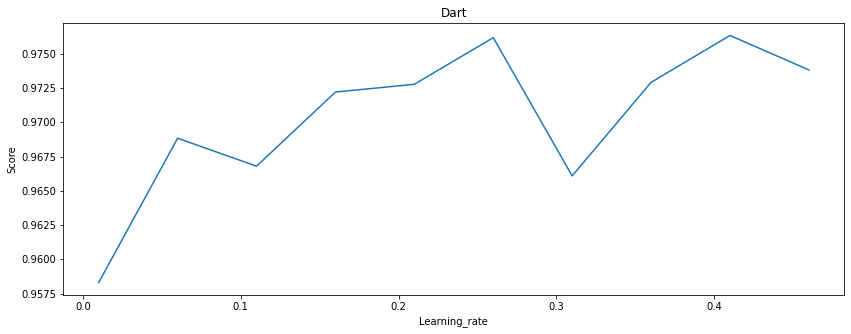

In [129]:
plot_graphic3(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

0:	learn: 0.5811572	total: 6.3ms	remaining: 309ms
1:	learn: 0.4908288	total: 14ms	remaining: 337ms
2:	learn: 0.4360240	total: 19.5ms	remaining: 305ms
3:	learn: 0.3865837	total: 25ms	remaining: 288ms
4:	learn: 0.3461630	total: 32.5ms	remaining: 292ms
5:	learn: 0.3103733	total: 38.1ms	remaining: 280ms
6:	learn: 0.2845917	total: 48.7ms	remaining: 299ms
7:	learn: 0.2650862	total: 54.6ms	remaining: 287ms
8:	learn: 0.2479246	total: 60.4ms	remaining: 275ms
9:	learn: 0.2368434	total: 66.3ms	remaining: 265ms
10:	learn: 0.2241691	total: 72.3ms	remaining: 256ms
11:	learn: 0.2128484	total: 78.4ms	remaining: 248ms
12:	learn: 0.2019648	total: 84.6ms	remaining: 241ms
13:	learn: 0.1948407	total: 90.8ms	remaining: 233ms
14:	learn: 0.1886423	total: 96.9ms	remaining: 226ms
15:	learn: 0.1807569	total: 103ms	remaining: 219ms
16:	learn: 0.1748659	total: 110ms	remaining: 213ms
17:	learn: 0.1690877	total: 116ms	remaining: 206ms
18:	learn: 0.1622714	total: 122ms	remaining: 200ms
19:	learn: 0.1582335	total: 128

128:	learn: 0.0508001	total: 806ms	remaining: 131ms
129:	learn: 0.0506768	total: 815ms	remaining: 125ms
130:	learn: 0.0502648	total: 823ms	remaining: 119ms
131:	learn: 0.0500740	total: 828ms	remaining: 113ms
132:	learn: 0.0495490	total: 835ms	remaining: 107ms
133:	learn: 0.0491498	total: 843ms	remaining: 101ms
134:	learn: 0.0489750	total: 849ms	remaining: 94.3ms
135:	learn: 0.0487079	total: 855ms	remaining: 88ms
136:	learn: 0.0484146	total: 861ms	remaining: 81.7ms
137:	learn: 0.0478837	total: 867ms	remaining: 75.3ms
138:	learn: 0.0478471	total: 873ms	remaining: 69.1ms
139:	learn: 0.0473392	total: 879ms	remaining: 62.8ms
140:	learn: 0.0469466	total: 885ms	remaining: 56.5ms
141:	learn: 0.0467644	total: 890ms	remaining: 50.2ms
142:	learn: 0.0465061	total: 896ms	remaining: 43.9ms
143:	learn: 0.0459110	total: 902ms	remaining: 37.6ms
144:	learn: 0.0458237	total: 907ms	remaining: 31.3ms
145:	learn: 0.0455564	total: 913ms	remaining: 25ms
146:	learn: 0.0454280	total: 918ms	remaining: 18.7ms
147

169:	learn: 0.0392310	total: 1.01s	remaining: 474ms
170:	learn: 0.0389815	total: 1.02s	remaining: 470ms
171:	learn: 0.0388600	total: 1.02s	remaining: 464ms
172:	learn: 0.0387457	total: 1.03s	remaining: 458ms
173:	learn: 0.0385213	total: 1.03s	remaining: 452ms
174:	learn: 0.0382853	total: 1.04s	remaining: 446ms
175:	learn: 0.0382668	total: 1.05s	remaining: 440ms
176:	learn: 0.0380632	total: 1.05s	remaining: 434ms
177:	learn: 0.0377613	total: 1.06s	remaining: 428ms
178:	learn: 0.0375188	total: 1.06s	remaining: 422ms
179:	learn: 0.0371608	total: 1.07s	remaining: 416ms
180:	learn: 0.0370158	total: 1.08s	remaining: 410ms
181:	learn: 0.0368524	total: 1.08s	remaining: 404ms
182:	learn: 0.0365649	total: 1.09s	remaining: 398ms
183:	learn: 0.0363953	total: 1.09s	remaining: 393ms
184:	learn: 0.0362488	total: 1.1s	remaining: 387ms
185:	learn: 0.0359860	total: 1.11s	remaining: 381ms
186:	learn: 0.0356336	total: 1.11s	remaining: 375ms
187:	learn: 0.0353915	total: 1.12s	remaining: 369ms
188:	learn: 0

102:	learn: 0.0586282	total: 606ms	remaining: 1.45s
103:	learn: 0.0584856	total: 613ms	remaining: 1.45s
104:	learn: 0.0583149	total: 623ms	remaining: 1.45s
105:	learn: 0.0579657	total: 628ms	remaining: 1.45s
106:	learn: 0.0578600	total: 635ms	remaining: 1.44s
107:	learn: 0.0574731	total: 640ms	remaining: 1.43s
108:	learn: 0.0569188	total: 648ms	remaining: 1.43s
109:	learn: 0.0565339	total: 653ms	remaining: 1.43s
110:	learn: 0.0560785	total: 660ms	remaining: 1.42s
111:	learn: 0.0560348	total: 666ms	remaining: 1.42s
112:	learn: 0.0557767	total: 672ms	remaining: 1.41s
113:	learn: 0.0554484	total: 678ms	remaining: 1.4s
114:	learn: 0.0550038	total: 685ms	remaining: 1.4s
115:	learn: 0.0548070	total: 691ms	remaining: 1.39s
116:	learn: 0.0544370	total: 697ms	remaining: 1.39s
117:	learn: 0.0540516	total: 702ms	remaining: 1.38s
118:	learn: 0.0539588	total: 708ms	remaining: 1.37s
119:	learn: 0.0536333	total: 714ms	remaining: 1.37s
120:	learn: 0.0532975	total: 720ms	remaining: 1.36s
121:	learn: 0.

265:	learn: 0.0242496	total: 1.61s	remaining: 508ms
266:	learn: 0.0241612	total: 1.62s	remaining: 503ms
267:	learn: 0.0240887	total: 1.63s	remaining: 497ms
268:	learn: 0.0239221	total: 1.63s	remaining: 491ms
269:	learn: 0.0236760	total: 1.64s	remaining: 485ms
270:	learn: 0.0236061	total: 1.64s	remaining: 479ms
271:	learn: 0.0234636	total: 1.65s	remaining: 473ms
272:	learn: 0.0233898	total: 1.65s	remaining: 467ms
273:	learn: 0.0232974	total: 1.66s	remaining: 461ms
274:	learn: 0.0232898	total: 1.67s	remaining: 455ms
275:	learn: 0.0232007	total: 1.67s	remaining: 449ms
276:	learn: 0.0231405	total: 1.68s	remaining: 443ms
277:	learn: 0.0230684	total: 1.69s	remaining: 437ms
278:	learn: 0.0229179	total: 1.69s	remaining: 431ms
279:	learn: 0.0228677	total: 1.7s	remaining: 425ms
280:	learn: 0.0227084	total: 1.7s	remaining: 418ms
281:	learn: 0.0226505	total: 1.71s	remaining: 412ms
282:	learn: 0.0225054	total: 1.72s	remaining: 406ms
283:	learn: 0.0223529	total: 1.72s	remaining: 400ms
284:	learn: 0.

99:	learn: 0.0596237	total: 602ms	remaining: 2.1s
100:	learn: 0.0593987	total: 611ms	remaining: 2.11s
101:	learn: 0.0588234	total: 619ms	remaining: 2.11s
102:	learn: 0.0586282	total: 625ms	remaining: 2.1s
103:	learn: 0.0584856	total: 631ms	remaining: 2.1s
104:	learn: 0.0583149	total: 637ms	remaining: 2.09s
105:	learn: 0.0579657	total: 643ms	remaining: 2.09s
106:	learn: 0.0578600	total: 649ms	remaining: 2.08s
107:	learn: 0.0574731	total: 655ms	remaining: 2.08s
108:	learn: 0.0569188	total: 662ms	remaining: 2.07s
109:	learn: 0.0565339	total: 668ms	remaining: 2.06s
110:	learn: 0.0560785	total: 678ms	remaining: 2.07s
111:	learn: 0.0560348	total: 685ms	remaining: 2.07s
112:	learn: 0.0557767	total: 693ms	remaining: 2.07s
113:	learn: 0.0554484	total: 699ms	remaining: 2.06s
114:	learn: 0.0550038	total: 705ms	remaining: 2.05s
115:	learn: 0.0548070	total: 711ms	remaining: 2.05s
116:	learn: 0.0544370	total: 717ms	remaining: 2.04s
117:	learn: 0.0540516	total: 723ms	remaining: 2.03s
118:	learn: 0.05

287:	learn: 0.0219139	total: 1.8s	remaining: 1.01s
288:	learn: 0.0218750	total: 1.81s	remaining: 1.01s
289:	learn: 0.0218465	total: 1.82s	remaining: 1s
290:	learn: 0.0216690	total: 1.82s	remaining: 997ms
291:	learn: 0.0215659	total: 1.83s	remaining: 991ms
292:	learn: 0.0213877	total: 1.84s	remaining: 984ms
293:	learn: 0.0212826	total: 1.84s	remaining: 978ms
294:	learn: 0.0211949	total: 1.85s	remaining: 972ms
295:	learn: 0.0209884	total: 1.85s	remaining: 965ms
296:	learn: 0.0208845	total: 1.86s	remaining: 959ms
297:	learn: 0.0208155	total: 1.87s	remaining: 952ms
298:	learn: 0.0207807	total: 1.87s	remaining: 946ms
299:	learn: 0.0206787	total: 1.88s	remaining: 940ms
300:	learn: 0.0206133	total: 1.89s	remaining: 933ms
301:	learn: 0.0204262	total: 1.89s	remaining: 927ms
302:	learn: 0.0203157	total: 1.9s	remaining: 921ms
303:	learn: 0.0202289	total: 1.9s	remaining: 914ms
304:	learn: 0.0200741	total: 1.91s	remaining: 908ms
305:	learn: 0.0199191	total: 1.92s	remaining: 902ms
306:	learn: 0.0197

0:	learn: 0.5811572	total: 6.12ms	remaining: 3.36s
1:	learn: 0.4908288	total: 11.8ms	remaining: 3.25s
2:	learn: 0.4360240	total: 17.5ms	remaining: 3.19s
3:	learn: 0.3865837	total: 23.4ms	remaining: 3.19s
4:	learn: 0.3461630	total: 29.2ms	remaining: 3.18s
5:	learn: 0.3103733	total: 35.1ms	remaining: 3.18s
6:	learn: 0.2845917	total: 41.2ms	remaining: 3.19s
7:	learn: 0.2650862	total: 47.4ms	remaining: 3.21s
8:	learn: 0.2479246	total: 53.5ms	remaining: 3.21s
9:	learn: 0.2368434	total: 59.7ms	remaining: 3.22s
10:	learn: 0.2241691	total: 65.7ms	remaining: 3.22s
11:	learn: 0.2128484	total: 71.7ms	remaining: 3.21s
12:	learn: 0.2019648	total: 77.9ms	remaining: 3.22s
13:	learn: 0.1948407	total: 84ms	remaining: 3.22s
14:	learn: 0.1886423	total: 90.2ms	remaining: 3.22s
15:	learn: 0.1807569	total: 96.4ms	remaining: 3.22s
16:	learn: 0.1748659	total: 103ms	remaining: 3.21s
17:	learn: 0.1690877	total: 109ms	remaining: 3.21s
18:	learn: 0.1622714	total: 115ms	remaining: 3.2s
19:	learn: 0.1582335	total: 

160:	learn: 0.0414081	total: 1.02s	remaining: 2.46s
161:	learn: 0.0411912	total: 1.03s	remaining: 2.46s
162:	learn: 0.0408971	total: 1.03s	remaining: 2.46s
163:	learn: 0.0406099	total: 1.04s	remaining: 2.45s
164:	learn: 0.0404857	total: 1.05s	remaining: 2.44s
165:	learn: 0.0401904	total: 1.05s	remaining: 2.43s
166:	learn: 0.0400102	total: 1.06s	remaining: 2.43s
167:	learn: 0.0397265	total: 1.06s	remaining: 2.42s
168:	learn: 0.0395039	total: 1.07s	remaining: 2.41s
169:	learn: 0.0392310	total: 1.08s	remaining: 2.4s
170:	learn: 0.0389815	total: 1.08s	remaining: 2.4s
171:	learn: 0.0388600	total: 1.09s	remaining: 2.39s
172:	learn: 0.0387457	total: 1.09s	remaining: 2.38s
173:	learn: 0.0385213	total: 1.1s	remaining: 2.38s
174:	learn: 0.0382853	total: 1.1s	remaining: 2.37s
175:	learn: 0.0382668	total: 1.11s	remaining: 2.36s
176:	learn: 0.0380632	total: 1.12s	remaining: 2.35s
177:	learn: 0.0377613	total: 1.12s	remaining: 2.35s
178:	learn: 0.0375188	total: 1.13s	remaining: 2.34s
179:	learn: 0.03

324:	learn: 0.0180300	total: 2.03s	remaining: 1.4s
325:	learn: 0.0180229	total: 2.04s	remaining: 1.4s
326:	learn: 0.0179451	total: 2.05s	remaining: 1.4s
327:	learn: 0.0178154	total: 2.05s	remaining: 1.39s
328:	learn: 0.0177340	total: 2.06s	remaining: 1.38s
329:	learn: 0.0176290	total: 2.06s	remaining: 1.38s
330:	learn: 0.0176109	total: 2.07s	remaining: 1.37s
331:	learn: 0.0175321	total: 2.07s	remaining: 1.36s
332:	learn: 0.0175061	total: 2.08s	remaining: 1.35s
333:	learn: 0.0174211	total: 2.08s	remaining: 1.35s
334:	learn: 0.0173096	total: 2.09s	remaining: 1.34s
335:	learn: 0.0172243	total: 2.1s	remaining: 1.33s
336:	learn: 0.0172204	total: 2.1s	remaining: 1.33s
337:	learn: 0.0171292	total: 2.11s	remaining: 1.32s
338:	learn: 0.0170647	total: 2.11s	remaining: 1.31s
339:	learn: 0.0169903	total: 2.12s	remaining: 1.31s
340:	learn: 0.0169715	total: 2.12s	remaining: 1.3s
341:	learn: 0.0168882	total: 2.13s	remaining: 1.29s
342:	learn: 0.0168324	total: 2.13s	remaining: 1.29s
343:	learn: 0.0167

486:	learn: 0.0097219	total: 3.03s	remaining: 392ms
487:	learn: 0.0097219	total: 3.04s	remaining: 386ms
488:	learn: 0.0096788	total: 3.05s	remaining: 380ms
489:	learn: 0.0096436	total: 3.05s	remaining: 374ms
490:	learn: 0.0096026	total: 3.06s	remaining: 367ms
491:	learn: 0.0096025	total: 3.06s	remaining: 361ms
492:	learn: 0.0095890	total: 3.07s	remaining: 355ms
493:	learn: 0.0095722	total: 3.08s	remaining: 349ms
494:	learn: 0.0095225	total: 3.08s	remaining: 342ms
495:	learn: 0.0095093	total: 3.09s	remaining: 336ms
496:	learn: 0.0095088	total: 3.09s	remaining: 330ms
497:	learn: 0.0094764	total: 3.1s	remaining: 324ms
498:	learn: 0.0094497	total: 3.11s	remaining: 317ms
499:	learn: 0.0094298	total: 3.11s	remaining: 311ms
500:	learn: 0.0093840	total: 3.12s	remaining: 305ms
501:	learn: 0.0093534	total: 3.12s	remaining: 299ms
502:	learn: 0.0092735	total: 3.13s	remaining: 292ms
503:	learn: 0.0092734	total: 3.13s	remaining: 286ms
504:	learn: 0.0092415	total: 3.14s	remaining: 280ms
505:	learn: 0

125:	learn: 0.0518790	total: 802ms	remaining: 3.33s
126:	learn: 0.0513654	total: 810ms	remaining: 3.34s
127:	learn: 0.0509359	total: 819ms	remaining: 3.34s
128:	learn: 0.0508001	total: 827ms	remaining: 3.34s
129:	learn: 0.0506768	total: 832ms	remaining: 3.33s
130:	learn: 0.0502648	total: 839ms	remaining: 3.33s
131:	learn: 0.0500740	total: 846ms	remaining: 3.32s
132:	learn: 0.0495490	total: 852ms	remaining: 3.31s
133:	learn: 0.0491498	total: 858ms	remaining: 3.3s
134:	learn: 0.0489750	total: 864ms	remaining: 3.29s
135:	learn: 0.0487079	total: 870ms	remaining: 3.29s
136:	learn: 0.0484146	total: 876ms	remaining: 3.28s
137:	learn: 0.0478837	total: 882ms	remaining: 3.27s
138:	learn: 0.0478471	total: 887ms	remaining: 3.26s
139:	learn: 0.0473392	total: 893ms	remaining: 3.25s
140:	learn: 0.0469466	total: 899ms	remaining: 3.25s
141:	learn: 0.0467644	total: 905ms	remaining: 3.24s
142:	learn: 0.0465061	total: 911ms	remaining: 3.23s
143:	learn: 0.0459110	total: 917ms	remaining: 3.22s
144:	learn: 0

289:	learn: 0.0218465	total: 1.79s	remaining: 2.23s
290:	learn: 0.0216690	total: 1.8s	remaining: 2.23s
291:	learn: 0.0215659	total: 1.81s	remaining: 2.22s
292:	learn: 0.0213877	total: 1.82s	remaining: 2.22s
293:	learn: 0.0212826	total: 1.83s	remaining: 2.21s
294:	learn: 0.0211949	total: 1.83s	remaining: 2.21s
295:	learn: 0.0209884	total: 1.84s	remaining: 2.2s
296:	learn: 0.0208845	total: 1.85s	remaining: 2.19s
297:	learn: 0.0208155	total: 1.85s	remaining: 2.19s
298:	learn: 0.0207807	total: 1.86s	remaining: 2.18s
299:	learn: 0.0206787	total: 1.86s	remaining: 2.17s
300:	learn: 0.0206133	total: 1.87s	remaining: 2.17s
301:	learn: 0.0204262	total: 1.88s	remaining: 2.16s
302:	learn: 0.0203157	total: 1.88s	remaining: 2.16s
303:	learn: 0.0202289	total: 1.89s	remaining: 2.15s
304:	learn: 0.0200741	total: 1.9s	remaining: 2.14s
305:	learn: 0.0199191	total: 1.9s	remaining: 2.14s
306:	learn: 0.0197762	total: 1.91s	remaining: 2.13s
307:	learn: 0.0195978	total: 1.92s	remaining: 2.13s
308:	learn: 0.01

456:	learn: 0.0107574	total: 2.8s	remaining: 1.18s
457:	learn: 0.0107062	total: 2.81s	remaining: 1.18s
458:	learn: 0.0106642	total: 2.81s	remaining: 1.17s
459:	learn: 0.0106363	total: 2.82s	remaining: 1.17s
460:	learn: 0.0105913	total: 2.83s	remaining: 1.16s
461:	learn: 0.0105539	total: 2.84s	remaining: 1.15s
462:	learn: 0.0105528	total: 2.84s	remaining: 1.15s
463:	learn: 0.0105038	total: 2.85s	remaining: 1.14s
464:	learn: 0.0104842	total: 2.85s	remaining: 1.14s
465:	learn: 0.0104450	total: 2.86s	remaining: 1.13s
466:	learn: 0.0104047	total: 2.86s	remaining: 1.12s
467:	learn: 0.0103843	total: 2.87s	remaining: 1.12s
468:	learn: 0.0103364	total: 2.88s	remaining: 1.11s
469:	learn: 0.0102453	total: 2.88s	remaining: 1.1s
470:	learn: 0.0102216	total: 2.89s	remaining: 1.1s
471:	learn: 0.0101956	total: 2.89s	remaining: 1.09s
472:	learn: 0.0101537	total: 2.9s	remaining: 1.08s
473:	learn: 0.0100837	total: 2.9s	remaining: 1.08s
474:	learn: 0.0100837	total: 2.91s	remaining: 1.07s
475:	learn: 0.010

632:	learn: 0.0070975	total: 3.81s	remaining: 102ms
633:	learn: 0.0070975	total: 3.82s	remaining: 96.4ms
634:	learn: 0.0070974	total: 3.83s	remaining: 90.4ms
635:	learn: 0.0070974	total: 3.83s	remaining: 84.4ms
636:	learn: 0.0070974	total: 3.84s	remaining: 78.3ms
637:	learn: 0.0070737	total: 3.84s	remaining: 72.3ms
638:	learn: 0.0070495	total: 3.85s	remaining: 66.3ms
639:	learn: 0.0070312	total: 3.85s	remaining: 60.2ms
640:	learn: 0.0070151	total: 3.86s	remaining: 54.2ms
641:	learn: 0.0070151	total: 3.87s	remaining: 48.2ms
642:	learn: 0.0070150	total: 3.87s	remaining: 42.2ms
643:	learn: 0.0070150	total: 3.88s	remaining: 36.1ms
644:	learn: 0.0070047	total: 3.88s	remaining: 30.1ms
645:	learn: 0.0070047	total: 3.89s	remaining: 24.1ms
646:	learn: 0.0070047	total: 3.89s	remaining: 18.1ms
647:	learn: 0.0070047	total: 3.9s	remaining: 12ms
648:	learn: 0.0070047	total: 3.9s	remaining: 6.01ms
649:	learn: 0.0070046	total: 3.91s	remaining: 0us
0:	learn: 0.5811572	total: 5.62ms	remaining: 4.21s
1:	

160:	learn: 0.0414081	total: 1s	remaining: 3.68s
161:	learn: 0.0411912	total: 1.01s	remaining: 3.68s
162:	learn: 0.0408971	total: 1.02s	remaining: 3.68s
163:	learn: 0.0406099	total: 1.03s	remaining: 3.68s
164:	learn: 0.0404857	total: 1.03s	remaining: 3.67s
165:	learn: 0.0401904	total: 1.04s	remaining: 3.67s
166:	learn: 0.0400102	total: 1.05s	remaining: 3.66s
167:	learn: 0.0397265	total: 1.05s	remaining: 3.65s
168:	learn: 0.0395039	total: 1.06s	remaining: 3.65s
169:	learn: 0.0392310	total: 1.07s	remaining: 3.64s
170:	learn: 0.0389815	total: 1.07s	remaining: 3.63s
171:	learn: 0.0388600	total: 1.08s	remaining: 3.63s
172:	learn: 0.0387457	total: 1.08s	remaining: 3.62s
173:	learn: 0.0385213	total: 1.09s	remaining: 3.61s
174:	learn: 0.0382853	total: 1.1s	remaining: 3.6s
175:	learn: 0.0382668	total: 1.1s	remaining: 3.6s
176:	learn: 0.0380632	total: 1.11s	remaining: 3.59s
177:	learn: 0.0377613	total: 1.12s	remaining: 3.59s
178:	learn: 0.0375188	total: 1.12s	remaining: 3.58s
179:	learn: 0.03716

324:	learn: 0.0180300	total: 2s	remaining: 2.62s
325:	learn: 0.0180229	total: 2.02s	remaining: 2.62s
326:	learn: 0.0179451	total: 2.02s	remaining: 2.62s
327:	learn: 0.0178154	total: 2.03s	remaining: 2.61s
328:	learn: 0.0177340	total: 2.04s	remaining: 2.61s
329:	learn: 0.0176290	total: 2.04s	remaining: 2.6s
330:	learn: 0.0176109	total: 2.05s	remaining: 2.59s
331:	learn: 0.0175321	total: 2.06s	remaining: 2.59s
332:	learn: 0.0175061	total: 2.06s	remaining: 2.58s
333:	learn: 0.0174211	total: 2.07s	remaining: 2.58s
334:	learn: 0.0173096	total: 2.07s	remaining: 2.57s
335:	learn: 0.0172243	total: 2.08s	remaining: 2.56s
336:	learn: 0.0172204	total: 2.08s	remaining: 2.56s
337:	learn: 0.0171292	total: 2.09s	remaining: 2.55s
338:	learn: 0.0170647	total: 2.1s	remaining: 2.54s
339:	learn: 0.0169903	total: 2.1s	remaining: 2.54s
340:	learn: 0.0169715	total: 2.11s	remaining: 2.53s
341:	learn: 0.0168882	total: 2.12s	remaining: 2.52s
342:	learn: 0.0168324	total: 2.12s	remaining: 2.52s
343:	learn: 0.0167

511:	learn: 0.0090178	total: 3.19s	remaining: 1.48s
512:	learn: 0.0089225	total: 3.2s	remaining: 1.48s
513:	learn: 0.0088710	total: 3.21s	remaining: 1.47s
514:	learn: 0.0088710	total: 3.21s	remaining: 1.47s
515:	learn: 0.0088604	total: 3.22s	remaining: 1.46s
516:	learn: 0.0088393	total: 3.23s	remaining: 1.45s
517:	learn: 0.0088392	total: 3.23s	remaining: 1.45s
518:	learn: 0.0088252	total: 3.24s	remaining: 1.44s
519:	learn: 0.0087726	total: 3.25s	remaining: 1.44s
520:	learn: 0.0087344	total: 3.25s	remaining: 1.43s
521:	learn: 0.0087344	total: 3.26s	remaining: 1.42s
522:	learn: 0.0086676	total: 3.26s	remaining: 1.42s
523:	learn: 0.0086382	total: 3.27s	remaining: 1.41s
524:	learn: 0.0086382	total: 3.27s	remaining: 1.4s
525:	learn: 0.0086143	total: 3.28s	remaining: 1.4s
526:	learn: 0.0086143	total: 3.29s	remaining: 1.39s
527:	learn: 0.0085831	total: 3.29s	remaining: 1.38s
528:	learn: 0.0085831	total: 3.3s	remaining: 1.38s
529:	learn: 0.0085476	total: 3.3s	remaining: 1.37s
530:	learn: 0.008

683:	learn: 0.0069040	total: 4.2s	remaining: 405ms
684:	learn: 0.0069040	total: 4.21s	remaining: 399ms
685:	learn: 0.0069040	total: 4.21s	remaining: 393ms
686:	learn: 0.0069040	total: 4.22s	remaining: 387ms
687:	learn: 0.0068844	total: 4.22s	remaining: 381ms
688:	learn: 0.0068844	total: 4.23s	remaining: 374ms
689:	learn: 0.0068843	total: 4.23s	remaining: 368ms
690:	learn: 0.0068843	total: 4.24s	remaining: 362ms
691:	learn: 0.0068843	total: 4.25s	remaining: 356ms
692:	learn: 0.0068842	total: 4.25s	remaining: 350ms
693:	learn: 0.0068518	total: 4.26s	remaining: 343ms
694:	learn: 0.0068518	total: 4.26s	remaining: 337ms
695:	learn: 0.0068350	total: 4.27s	remaining: 331ms
696:	learn: 0.0068083	total: 4.27s	remaining: 325ms
697:	learn: 0.0068083	total: 4.28s	remaining: 319ms
698:	learn: 0.0068083	total: 4.28s	remaining: 312ms
699:	learn: 0.0068083	total: 4.29s	remaining: 306ms
700:	learn: 0.0067717	total: 4.29s	remaining: 300ms
701:	learn: 0.0067716	total: 4.3s	remaining: 294ms
702:	learn: 0.

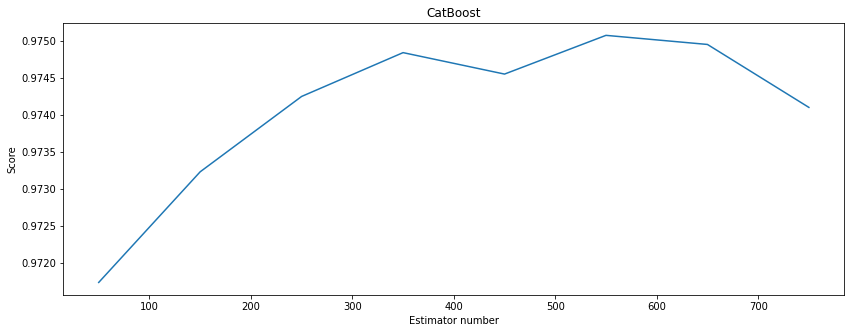

In [103]:
plot_graphic1(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

0:	learn: 0.5418562	total: 3.15ms	remaining: 784ms
1:	learn: 0.4729690	total: 8.51ms	remaining: 1.05s
2:	learn: 0.4173122	total: 14.9ms	remaining: 1.22s
3:	learn: 0.3701593	total: 18.3ms	remaining: 1.12s
4:	learn: 0.3368557	total: 21.1ms	remaining: 1.03s
5:	learn: 0.3130103	total: 23.1ms	remaining: 939ms
6:	learn: 0.2884500	total: 25.2ms	remaining: 875ms
7:	learn: 0.2727985	total: 27ms	remaining: 818ms
8:	learn: 0.2601326	total: 29.2ms	remaining: 781ms
9:	learn: 0.2457602	total: 31.5ms	remaining: 756ms
10:	learn: 0.2368192	total: 33.4ms	remaining: 725ms
11:	learn: 0.2271651	total: 35.3ms	remaining: 699ms
12:	learn: 0.2190475	total: 37ms	remaining: 675ms
13:	learn: 0.2073949	total: 39ms	remaining: 658ms
14:	learn: 0.2018560	total: 40.8ms	remaining: 640ms
15:	learn: 0.1956275	total: 42.7ms	remaining: 624ms
16:	learn: 0.1884789	total: 44.8ms	remaining: 613ms
17:	learn: 0.1835006	total: 47.9ms	remaining: 617ms
18:	learn: 0.1793941	total: 50.2ms	remaining: 610ms
19:	learn: 0.1749045	total: 

177:	learn: 0.0699492	total: 397ms	remaining: 160ms
178:	learn: 0.0697695	total: 399ms	remaining: 158ms
179:	learn: 0.0695816	total: 401ms	remaining: 156ms
180:	learn: 0.0693087	total: 403ms	remaining: 154ms
181:	learn: 0.0692939	total: 406ms	remaining: 152ms
182:	learn: 0.0692412	total: 408ms	remaining: 149ms
183:	learn: 0.0691239	total: 410ms	remaining: 147ms
184:	learn: 0.0689289	total: 412ms	remaining: 145ms
185:	learn: 0.0687417	total: 414ms	remaining: 142ms
186:	learn: 0.0685754	total: 416ms	remaining: 140ms
187:	learn: 0.0683273	total: 418ms	remaining: 138ms
188:	learn: 0.0682092	total: 421ms	remaining: 136ms
189:	learn: 0.0680520	total: 423ms	remaining: 133ms
190:	learn: 0.0679045	total: 425ms	remaining: 131ms
191:	learn: 0.0677533	total: 427ms	remaining: 129ms
192:	learn: 0.0674946	total: 429ms	remaining: 127ms
193:	learn: 0.0673521	total: 431ms	remaining: 124ms
194:	learn: 0.0672311	total: 433ms	remaining: 122ms
195:	learn: 0.0669974	total: 435ms	remaining: 120ms
196:	learn: 

106:	learn: 0.0289357	total: 398ms	remaining: 531ms
107:	learn: 0.0287765	total: 401ms	remaining: 528ms
108:	learn: 0.0285259	total: 405ms	remaining: 524ms
109:	learn: 0.0282820	total: 409ms	remaining: 520ms
110:	learn: 0.0278419	total: 412ms	remaining: 516ms
111:	learn: 0.0274782	total: 416ms	remaining: 513ms
112:	learn: 0.0271021	total: 420ms	remaining: 509ms
113:	learn: 0.0267448	total: 424ms	remaining: 505ms
114:	learn: 0.0267056	total: 427ms	remaining: 502ms
115:	learn: 0.0263443	total: 431ms	remaining: 498ms
116:	learn: 0.0261000	total: 435ms	remaining: 494ms
117:	learn: 0.0259116	total: 438ms	remaining: 490ms
118:	learn: 0.0255106	total: 442ms	remaining: 487ms
119:	learn: 0.0254319	total: 446ms	remaining: 483ms
120:	learn: 0.0252355	total: 450ms	remaining: 479ms
121:	learn: 0.0249465	total: 453ms	remaining: 476ms
122:	learn: 0.0246878	total: 457ms	remaining: 472ms
123:	learn: 0.0246876	total: 460ms	remaining: 467ms
124:	learn: 0.0243883	total: 464ms	remaining: 464ms
125:	learn: 

33:	learn: 0.0441033	total: 203ms	remaining: 1.29s
34:	learn: 0.0423602	total: 210ms	remaining: 1.29s
35:	learn: 0.0416901	total: 216ms	remaining: 1.28s
36:	learn: 0.0410732	total: 222ms	remaining: 1.28s
37:	learn: 0.0408888	total: 228ms	remaining: 1.27s
38:	learn: 0.0403769	total: 234ms	remaining: 1.27s
39:	learn: 0.0380342	total: 240ms	remaining: 1.26s
40:	learn: 0.0374799	total: 246ms	remaining: 1.26s
41:	learn: 0.0362412	total: 252ms	remaining: 1.25s
42:	learn: 0.0350216	total: 258ms	remaining: 1.24s
43:	learn: 0.0346175	total: 265ms	remaining: 1.24s
44:	learn: 0.0338808	total: 271ms	remaining: 1.23s
45:	learn: 0.0336157	total: 277ms	remaining: 1.23s
46:	learn: 0.0330733	total: 283ms	remaining: 1.22s
47:	learn: 0.0323950	total: 289ms	remaining: 1.22s
48:	learn: 0.0313414	total: 295ms	remaining: 1.21s
49:	learn: 0.0311093	total: 301ms	remaining: 1.21s
50:	learn: 0.0305763	total: 307ms	remaining: 1.2s
51:	learn: 0.0295591	total: 314ms	remaining: 1.19s
52:	learn: 0.0285557	total: 320m

198:	learn: 0.0060359	total: 1.19s	remaining: 306ms
199:	learn: 0.0059453	total: 1.2s	remaining: 300ms
200:	learn: 0.0059385	total: 1.21s	remaining: 294ms
201:	learn: 0.0058666	total: 1.21s	remaining: 288ms
202:	learn: 0.0058665	total: 1.22s	remaining: 282ms
203:	learn: 0.0057897	total: 1.22s	remaining: 276ms
204:	learn: 0.0056840	total: 1.23s	remaining: 270ms
205:	learn: 0.0056840	total: 1.23s	remaining: 264ms
206:	learn: 0.0055817	total: 1.24s	remaining: 258ms
207:	learn: 0.0055816	total: 1.25s	remaining: 252ms
208:	learn: 0.0055816	total: 1.25s	remaining: 246ms
209:	learn: 0.0055812	total: 1.26s	remaining: 240ms
210:	learn: 0.0055250	total: 1.27s	remaining: 234ms
211:	learn: 0.0052841	total: 1.27s	remaining: 229ms
212:	learn: 0.0052062	total: 1.28s	remaining: 223ms
213:	learn: 0.0052062	total: 1.29s	remaining: 216ms
214:	learn: 0.0052061	total: 1.29s	remaining: 210ms
215:	learn: 0.0052061	total: 1.3s	remaining: 204ms
216:	learn: 0.0052060	total: 1.3s	remaining: 198ms
217:	learn: 0.0

110:	learn: 0.0056270	total: 1.7s	remaining: 2.13s
111:	learn: 0.0055639	total: 1.71s	remaining: 2.11s
112:	learn: 0.0055637	total: 1.73s	remaining: 2.09s
113:	learn: 0.0055633	total: 1.74s	remaining: 2.08s
114:	learn: 0.0055579	total: 1.76s	remaining: 2.06s
115:	learn: 0.0055578	total: 1.77s	remaining: 2.04s
116:	learn: 0.0055576	total: 1.78s	remaining: 2.03s
117:	learn: 0.0055576	total: 1.8s	remaining: 2.01s
118:	learn: 0.0054942	total: 1.81s	remaining: 2s
119:	learn: 0.0053941	total: 1.83s	remaining: 1.98s
120:	learn: 0.0053940	total: 1.84s	remaining: 1.97s
121:	learn: 0.0053940	total: 1.86s	remaining: 1.95s
122:	learn: 0.0053940	total: 1.87s	remaining: 1.94s
123:	learn: 0.0053939	total: 1.89s	remaining: 1.92s
124:	learn: 0.0052479	total: 1.9s	remaining: 1.9s
125:	learn: 0.0051496	total: 1.92s	remaining: 1.89s
126:	learn: 0.0050597	total: 1.94s	remaining: 1.88s
127:	learn: 0.0050597	total: 1.95s	remaining: 1.86s
128:	learn: 0.0049843	total: 1.97s	remaining: 1.84s
129:	learn: 0.00498

20:	learn: 0.0235567	total: 1.29s	remaining: 14.1s
21:	learn: 0.0220079	total: 1.35s	remaining: 14s
22:	learn: 0.0212724	total: 1.41s	remaining: 14s
23:	learn: 0.0193224	total: 1.47s	remaining: 13.9s
24:	learn: 0.0184102	total: 1.53s	remaining: 13.8s
25:	learn: 0.0177207	total: 1.59s	remaining: 13.7s
26:	learn: 0.0165143	total: 1.66s	remaining: 13.7s
27:	learn: 0.0164476	total: 1.72s	remaining: 13.6s
28:	learn: 0.0150103	total: 1.78s	remaining: 13.6s
29:	learn: 0.0138354	total: 1.84s	remaining: 13.5s
30:	learn: 0.0125551	total: 1.9s	remaining: 13.4s
31:	learn: 0.0123671	total: 1.96s	remaining: 13.3s
32:	learn: 0.0118539	total: 2.02s	remaining: 13.3s
33:	learn: 0.0112566	total: 2.08s	remaining: 13.2s
34:	learn: 0.0107572	total: 2.13s	remaining: 13.1s
35:	learn: 0.0104020	total: 2.19s	remaining: 13s
36:	learn: 0.0098932	total: 2.25s	remaining: 13s
37:	learn: 0.0098576	total: 2.31s	remaining: 12.9s
38:	learn: 0.0095865	total: 2.38s	remaining: 12.8s
39:	learn: 0.0094835	total: 2.44s	remain

184:	learn: 0.0034799	total: 11.2s	remaining: 3.92s
185:	learn: 0.0034799	total: 11.2s	remaining: 3.86s
186:	learn: 0.0034798	total: 11.3s	remaining: 3.8s
187:	learn: 0.0034798	total: 11.3s	remaining: 3.74s
188:	learn: 0.0034798	total: 11.4s	remaining: 3.68s
189:	learn: 0.0034797	total: 11.5s	remaining: 3.62s
190:	learn: 0.0034796	total: 11.5s	remaining: 3.56s
191:	learn: 0.0034796	total: 11.6s	remaining: 3.5s
192:	learn: 0.0033910	total: 11.6s	remaining: 3.44s
193:	learn: 0.0033910	total: 11.7s	remaining: 3.38s
194:	learn: 0.0033909	total: 11.8s	remaining: 3.32s
195:	learn: 0.0033909	total: 11.8s	remaining: 3.26s
196:	learn: 0.0033909	total: 11.9s	remaining: 3.2s
197:	learn: 0.0033909	total: 11.9s	remaining: 3.14s
198:	learn: 0.0033909	total: 12s	remaining: 3.08s
199:	learn: 0.0033909	total: 12.1s	remaining: 3.02s
200:	learn: 0.0033909	total: 12.1s	remaining: 2.96s
201:	learn: 0.0033908	total: 12.2s	remaining: 2.89s
202:	learn: 0.0033908	total: 12.2s	remaining: 2.83s
203:	learn: 0.003

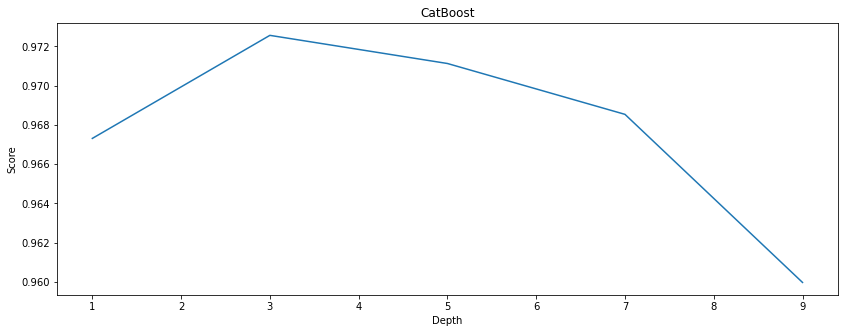

In [130]:
plot_graphic2(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

0:	learn: 0.6776505	total: 67.2ms	remaining: 16.7s
1:	learn: 0.6636316	total: 127ms	remaining: 15.8s
2:	learn: 0.6477373	total: 191ms	remaining: 15.7s
3:	learn: 0.6348985	total: 253ms	remaining: 15.6s
4:	learn: 0.6206396	total: 314ms	remaining: 15.4s
5:	learn: 0.6058869	total: 377ms	remaining: 15.3s
6:	learn: 0.5925262	total: 437ms	remaining: 15.2s
7:	learn: 0.5812992	total: 496ms	remaining: 15s
8:	learn: 0.5689150	total: 560ms	remaining: 15s
9:	learn: 0.5572451	total: 619ms	remaining: 14.8s
10:	learn: 0.5451620	total: 681ms	remaining: 14.8s
11:	learn: 0.5346872	total: 744ms	remaining: 14.8s
12:	learn: 0.5235810	total: 806ms	remaining: 14.7s
13:	learn: 0.5119150	total: 867ms	remaining: 14.6s
14:	learn: 0.5018641	total: 926ms	remaining: 14.5s
15:	learn: 0.4909060	total: 990ms	remaining: 14.5s
16:	learn: 0.4814844	total: 1.05s	remaining: 14.4s
17:	learn: 0.4718777	total: 1.11s	remaining: 14.3s
18:	learn: 0.4624853	total: 1.18s	remaining: 14.3s
19:	learn: 0.4532487	total: 1.24s	remaining:

163:	learn: 0.1085289	total: 10.2s	remaining: 5.35s
164:	learn: 0.1079818	total: 10.3s	remaining: 5.29s
165:	learn: 0.1073926	total: 10.3s	remaining: 5.22s
166:	learn: 0.1069230	total: 10.4s	remaining: 5.16s
167:	learn: 0.1063840	total: 10.4s	remaining: 5.1s
168:	learn: 0.1059079	total: 10.5s	remaining: 5.04s
169:	learn: 0.1052696	total: 10.6s	remaining: 4.97s
170:	learn: 0.1047885	total: 10.6s	remaining: 4.91s
171:	learn: 0.1043015	total: 10.7s	remaining: 4.85s
172:	learn: 0.1036418	total: 10.7s	remaining: 4.78s
173:	learn: 0.1031840	total: 10.8s	remaining: 4.72s
174:	learn: 0.1027125	total: 10.9s	remaining: 4.66s
175:	learn: 0.1022373	total: 10.9s	remaining: 4.6s
176:	learn: 0.1017188	total: 11s	remaining: 4.54s
177:	learn: 0.1012405	total: 11.1s	remaining: 4.47s
178:	learn: 0.1007973	total: 11.1s	remaining: 4.41s
179:	learn: 0.1002554	total: 11.2s	remaining: 4.35s
180:	learn: 0.0998540	total: 11.2s	remaining: 4.29s
181:	learn: 0.0994597	total: 11.3s	remaining: 4.22s
182:	learn: 0.09

76:	learn: 0.0451850	total: 4.75s	remaining: 10.7s
77:	learn: 0.0448413	total: 4.81s	remaining: 10.6s
78:	learn: 0.0442842	total: 4.87s	remaining: 10.5s
79:	learn: 0.0437345	total: 4.93s	remaining: 10.5s
80:	learn: 0.0432642	total: 5s	remaining: 10.4s
81:	learn: 0.0428733	total: 5.05s	remaining: 10.4s
82:	learn: 0.0425121	total: 5.11s	remaining: 10.3s
83:	learn: 0.0421022	total: 5.17s	remaining: 10.2s
84:	learn: 0.0416597	total: 5.23s	remaining: 10.2s
85:	learn: 0.0412982	total: 5.29s	remaining: 10.1s
86:	learn: 0.0410193	total: 5.36s	remaining: 10s
87:	learn: 0.0404942	total: 5.42s	remaining: 9.97s
88:	learn: 0.0399634	total: 5.48s	remaining: 9.91s
89:	learn: 0.0396407	total: 5.54s	remaining: 9.84s
90:	learn: 0.0393718	total: 5.6s	remaining: 9.78s
91:	learn: 0.0389279	total: 5.66s	remaining: 9.72s
92:	learn: 0.0385000	total: 5.72s	remaining: 9.66s
93:	learn: 0.0380764	total: 5.78s	remaining: 9.6s
94:	learn: 0.0376833	total: 5.84s	remaining: 9.53s
95:	learn: 0.0374055	total: 5.9s	remai

236:	learn: 0.0135420	total: 14.5s	remaining: 795ms
237:	learn: 0.0135129	total: 14.6s	remaining: 734ms
238:	learn: 0.0134306	total: 14.6s	remaining: 673ms
239:	learn: 0.0132638	total: 14.7s	remaining: 612ms
240:	learn: 0.0131823	total: 14.7s	remaining: 551ms
241:	learn: 0.0131459	total: 14.8s	remaining: 489ms
242:	learn: 0.0130984	total: 14.9s	remaining: 428ms
243:	learn: 0.0130065	total: 14.9s	remaining: 367ms
244:	learn: 0.0129840	total: 15s	remaining: 306ms
245:	learn: 0.0129590	total: 15.1s	remaining: 245ms
246:	learn: 0.0128831	total: 15.1s	remaining: 184ms
247:	learn: 0.0128491	total: 15.2s	remaining: 122ms
248:	learn: 0.0128196	total: 15.2s	remaining: 61.2ms
249:	learn: 0.0127504	total: 15.3s	remaining: 0us
0:	learn: 0.5416636	total: 58.5ms	remaining: 14.6s
1:	learn: 0.4394869	total: 117ms	remaining: 14.6s
2:	learn: 0.3597663	total: 180ms	remaining: 14.8s
3:	learn: 0.3057221	total: 242ms	remaining: 14.9s
4:	learn: 0.2629021	total: 302ms	remaining: 14.8s
5:	learn: 0.2271963	tota

147:	learn: 0.0113788	total: 9.04s	remaining: 6.23s
148:	learn: 0.0112961	total: 9.1s	remaining: 6.17s
149:	learn: 0.0112718	total: 9.16s	remaining: 6.11s
150:	learn: 0.0111430	total: 9.22s	remaining: 6.04s
151:	learn: 0.0110441	total: 9.28s	remaining: 5.98s
152:	learn: 0.0109146	total: 9.34s	remaining: 5.92s
153:	learn: 0.0108428	total: 9.4s	remaining: 5.86s
154:	learn: 0.0107251	total: 9.46s	remaining: 5.8s
155:	learn: 0.0105445	total: 9.52s	remaining: 5.74s
156:	learn: 0.0104573	total: 9.59s	remaining: 5.68s
157:	learn: 0.0103428	total: 9.65s	remaining: 5.62s
158:	learn: 0.0102486	total: 9.71s	remaining: 5.56s
159:	learn: 0.0101435	total: 9.77s	remaining: 5.49s
160:	learn: 0.0100288	total: 9.83s	remaining: 5.43s
161:	learn: 0.0099191	total: 9.89s	remaining: 5.37s
162:	learn: 0.0097683	total: 9.95s	remaining: 5.31s
163:	learn: 0.0096411	total: 10s	remaining: 5.25s
164:	learn: 0.0095534	total: 10.1s	remaining: 5.19s
165:	learn: 0.0095082	total: 10.1s	remaining: 5.13s
166:	learn: 0.009

60:	learn: 0.0227224	total: 3.72s	remaining: 11.5s
61:	learn: 0.0224662	total: 3.78s	remaining: 11.5s
62:	learn: 0.0222586	total: 3.84s	remaining: 11.4s
63:	learn: 0.0216665	total: 3.9s	remaining: 11.3s
64:	learn: 0.0212840	total: 3.96s	remaining: 11.3s
65:	learn: 0.0210579	total: 4.03s	remaining: 11.2s
66:	learn: 0.0207558	total: 4.08s	remaining: 11.2s
67:	learn: 0.0201681	total: 4.14s	remaining: 11.1s
68:	learn: 0.0197333	total: 4.2s	remaining: 11s
69:	learn: 0.0193423	total: 4.26s	remaining: 11s
70:	learn: 0.0190247	total: 4.32s	remaining: 10.9s
71:	learn: 0.0184760	total: 4.39s	remaining: 10.8s
72:	learn: 0.0183387	total: 4.45s	remaining: 10.8s
73:	learn: 0.0182576	total: 4.51s	remaining: 10.7s
74:	learn: 0.0179452	total: 4.57s	remaining: 10.7s
75:	learn: 0.0177393	total: 4.63s	remaining: 10.6s
76:	learn: 0.0174446	total: 4.7s	remaining: 10.6s
77:	learn: 0.0171844	total: 4.76s	remaining: 10.5s
78:	learn: 0.0169243	total: 4.82s	remaining: 10.4s
79:	learn: 0.0168050	total: 4.88s	rema

220:	learn: 0.0040913	total: 13.4s	remaining: 1.76s
221:	learn: 0.0040912	total: 13.5s	remaining: 1.7s
222:	learn: 0.0040911	total: 13.6s	remaining: 1.64s
223:	learn: 0.0040910	total: 13.6s	remaining: 1.58s
224:	learn: 0.0040910	total: 13.7s	remaining: 1.52s
225:	learn: 0.0040408	total: 13.7s	remaining: 1.46s
226:	learn: 0.0040056	total: 13.8s	remaining: 1.4s
227:	learn: 0.0040056	total: 13.9s	remaining: 1.34s
228:	learn: 0.0039578	total: 13.9s	remaining: 1.28s
229:	learn: 0.0039578	total: 14s	remaining: 1.22s
230:	learn: 0.0039577	total: 14s	remaining: 1.15s
231:	learn: 0.0039066	total: 14.1s	remaining: 1.09s
232:	learn: 0.0039066	total: 14.2s	remaining: 1.03s
233:	learn: 0.0038782	total: 14.2s	remaining: 972ms
234:	learn: 0.0038782	total: 14.3s	remaining: 911ms
235:	learn: 0.0038781	total: 14.3s	remaining: 850ms
236:	learn: 0.0038781	total: 14.4s	remaining: 790ms
237:	learn: 0.0038496	total: 14.5s	remaining: 729ms
238:	learn: 0.0038496	total: 14.5s	remaining: 668ms
239:	learn: 0.0038

132:	learn: 0.0059711	total: 8.07s	remaining: 7.1s
133:	learn: 0.0058817	total: 8.13s	remaining: 7.04s
134:	learn: 0.0057472	total: 8.19s	remaining: 6.98s
135:	learn: 0.0056715	total: 8.25s	remaining: 6.92s
136:	learn: 0.0055502	total: 8.32s	remaining: 6.86s
137:	learn: 0.0055502	total: 8.38s	remaining: 6.8s
138:	learn: 0.0055502	total: 8.44s	remaining: 6.74s
139:	learn: 0.0055502	total: 8.5s	remaining: 6.67s
140:	learn: 0.0055502	total: 8.55s	remaining: 6.61s
141:	learn: 0.0054693	total: 8.62s	remaining: 6.55s
142:	learn: 0.0054218	total: 8.68s	remaining: 6.49s
143:	learn: 0.0053814	total: 8.74s	remaining: 6.43s
144:	learn: 0.0053814	total: 8.8s	remaining: 6.37s
145:	learn: 0.0053570	total: 8.86s	remaining: 6.31s
146:	learn: 0.0052827	total: 8.92s	remaining: 6.25s
147:	learn: 0.0052147	total: 8.98s	remaining: 6.19s
148:	learn: 0.0051819	total: 9.04s	remaining: 6.13s
149:	learn: 0.0051416	total: 9.1s	remaining: 6.07s
150:	learn: 0.0051416	total: 9.16s	remaining: 6.01s
151:	learn: 0.005

44:	learn: 0.0185816	total: 2.75s	remaining: 12.5s
45:	learn: 0.0181663	total: 2.8s	remaining: 12.4s
46:	learn: 0.0176392	total: 2.86s	remaining: 12.4s
47:	learn: 0.0172015	total: 2.92s	remaining: 12.3s
48:	learn: 0.0166276	total: 2.99s	remaining: 12.3s
49:	learn: 0.0161842	total: 3.05s	remaining: 12.2s
50:	learn: 0.0153717	total: 3.11s	remaining: 12.1s
51:	learn: 0.0150108	total: 3.17s	remaining: 12.1s
52:	learn: 0.0149891	total: 3.23s	remaining: 12s
53:	learn: 0.0146311	total: 3.31s	remaining: 12s
54:	learn: 0.0144144	total: 3.37s	remaining: 12s
55:	learn: 0.0138415	total: 3.45s	remaining: 11.9s
56:	learn: 0.0133520	total: 3.51s	remaining: 11.9s
57:	learn: 0.0129100	total: 3.58s	remaining: 11.8s
58:	learn: 0.0124808	total: 3.64s	remaining: 11.8s
59:	learn: 0.0121661	total: 3.7s	remaining: 11.7s
60:	learn: 0.0118376	total: 3.75s	remaining: 11.6s
61:	learn: 0.0114397	total: 3.82s	remaining: 11.6s
62:	learn: 0.0110341	total: 3.88s	remaining: 11.5s
63:	learn: 0.0106694	total: 3.94s	remai

206:	learn: 0.0045999	total: 12.5s	remaining: 2.6s
207:	learn: 0.0045999	total: 12.6s	remaining: 2.54s
208:	learn: 0.0044463	total: 12.7s	remaining: 2.48s
209:	learn: 0.0044463	total: 12.7s	remaining: 2.42s
210:	learn: 0.0043422	total: 12.8s	remaining: 2.36s
211:	learn: 0.0042738	total: 12.8s	remaining: 2.3s
212:	learn: 0.0042738	total: 12.9s	remaining: 2.24s
213:	learn: 0.0041805	total: 13s	remaining: 2.18s
214:	learn: 0.0041345	total: 13s	remaining: 2.12s
215:	learn: 0.0041345	total: 13.1s	remaining: 2.06s
216:	learn: 0.0041333	total: 13.1s	remaining: 2s
217:	learn: 0.0041331	total: 13.2s	remaining: 1.94s
218:	learn: 0.0041331	total: 13.3s	remaining: 1.88s
219:	learn: 0.0041331	total: 13.3s	remaining: 1.82s
220:	learn: 0.0041328	total: 13.3s	remaining: 1.75s
221:	learn: 0.0040888	total: 13.4s	remaining: 1.69s
222:	learn: 0.0040888	total: 13.4s	remaining: 1.63s
223:	learn: 0.0040681	total: 13.5s	remaining: 1.57s
224:	learn: 0.0040234	total: 13.6s	remaining: 1.51s
225:	learn: 0.0039853

120:	learn: 0.0039083	total: 7.37s	remaining: 7.86s
121:	learn: 0.0038218	total: 7.43s	remaining: 7.8s
122:	learn: 0.0038217	total: 7.49s	remaining: 7.74s
123:	learn: 0.0038216	total: 7.55s	remaining: 7.67s
124:	learn: 0.0038216	total: 7.61s	remaining: 7.61s
125:	learn: 0.0038216	total: 7.67s	remaining: 7.55s
126:	learn: 0.0038215	total: 7.73s	remaining: 7.49s
127:	learn: 0.0037793	total: 7.79s	remaining: 7.43s
128:	learn: 0.0037792	total: 7.86s	remaining: 7.37s
129:	learn: 0.0037792	total: 7.91s	remaining: 7.3s
130:	learn: 0.0036811	total: 7.97s	remaining: 7.24s
131:	learn: 0.0036224	total: 8.03s	remaining: 7.18s
132:	learn: 0.0036224	total: 8.09s	remaining: 7.12s
133:	learn: 0.0036223	total: 8.15s	remaining: 7.06s
134:	learn: 0.0035322	total: 8.21s	remaining: 7s
135:	learn: 0.0035322	total: 8.27s	remaining: 6.93s
136:	learn: 0.0035321	total: 8.34s	remaining: 6.88s
137:	learn: 0.0034630	total: 8.4s	remaining: 6.82s
138:	learn: 0.0034255	total: 8.46s	remaining: 6.76s
139:	learn: 0.0033

32:	learn: 0.0170137	total: 2.02s	remaining: 13.3s
33:	learn: 0.0164471	total: 2.08s	remaining: 13.2s
34:	learn: 0.0161836	total: 2.14s	remaining: 13.2s
35:	learn: 0.0157015	total: 2.2s	remaining: 13.1s
36:	learn: 0.0147823	total: 2.26s	remaining: 13s
37:	learn: 0.0145218	total: 2.32s	remaining: 13s
38:	learn: 0.0144584	total: 2.38s	remaining: 12.9s
39:	learn: 0.0138233	total: 2.44s	remaining: 12.8s
40:	learn: 0.0134631	total: 2.5s	remaining: 12.8s
41:	learn: 0.0129979	total: 2.57s	remaining: 12.7s
42:	learn: 0.0125928	total: 2.62s	remaining: 12.6s
43:	learn: 0.0123991	total: 2.69s	remaining: 12.6s
44:	learn: 0.0117366	total: 2.75s	remaining: 12.5s
45:	learn: 0.0112490	total: 2.81s	remaining: 12.5s
46:	learn: 0.0109151	total: 2.88s	remaining: 12.4s
47:	learn: 0.0109150	total: 2.94s	remaining: 12.4s
48:	learn: 0.0100943	total: 3s	remaining: 12.3s
49:	learn: 0.0098350	total: 3.06s	remaining: 12.2s
50:	learn: 0.0096635	total: 3.12s	remaining: 12.2s
51:	learn: 0.0095135	total: 3.18s	remain

192:	learn: 0.0030479	total: 11.7s	remaining: 3.46s
193:	learn: 0.0030479	total: 11.8s	remaining: 3.4s
194:	learn: 0.0030477	total: 11.8s	remaining: 3.34s
195:	learn: 0.0030477	total: 11.9s	remaining: 3.28s
196:	learn: 0.0030476	total: 12s	remaining: 3.22s
197:	learn: 0.0030476	total: 12s	remaining: 3.16s
198:	learn: 0.0030474	total: 12.1s	remaining: 3.1s
199:	learn: 0.0030474	total: 12.1s	remaining: 3.04s
200:	learn: 0.0030309	total: 12.2s	remaining: 2.98s
201:	learn: 0.0030308	total: 12.3s	remaining: 2.91s
202:	learn: 0.0030307	total: 12.3s	remaining: 2.85s
203:	learn: 0.0030307	total: 12.4s	remaining: 2.79s
204:	learn: 0.0030306	total: 12.4s	remaining: 2.73s
205:	learn: 0.0030305	total: 12.5s	remaining: 2.67s
206:	learn: 0.0030305	total: 12.6s	remaining: 2.61s
207:	learn: 0.0030304	total: 12.6s	remaining: 2.55s
208:	learn: 0.0030304	total: 12.7s	remaining: 2.49s
209:	learn: 0.0030304	total: 12.7s	remaining: 2.43s
210:	learn: 0.0030304	total: 12.8s	remaining: 2.37s
211:	learn: 0.0030

104:	learn: 0.0032909	total: 6.35s	remaining: 8.77s
105:	learn: 0.0032909	total: 6.41s	remaining: 8.71s
106:	learn: 0.0032908	total: 6.47s	remaining: 8.64s
107:	learn: 0.0032908	total: 6.53s	remaining: 8.58s
108:	learn: 0.0032908	total: 6.58s	remaining: 8.52s
109:	learn: 0.0032908	total: 6.64s	remaining: 8.46s
110:	learn: 0.0032908	total: 6.7s	remaining: 8.39s
111:	learn: 0.0032908	total: 6.76s	remaining: 8.33s
112:	learn: 0.0032908	total: 6.82s	remaining: 8.27s
113:	learn: 0.0032908	total: 6.88s	remaining: 8.2s
114:	learn: 0.0032908	total: 6.93s	remaining: 8.14s
115:	learn: 0.0032908	total: 6.99s	remaining: 8.08s
116:	learn: 0.0032908	total: 7.05s	remaining: 8.01s
117:	learn: 0.0032908	total: 7.11s	remaining: 7.95s
118:	learn: 0.0032907	total: 7.17s	remaining: 7.89s
119:	learn: 0.0032907	total: 7.22s	remaining: 7.83s
120:	learn: 0.0032906	total: 7.28s	remaining: 7.76s
121:	learn: 0.0032906	total: 7.34s	remaining: 7.7s
122:	learn: 0.0032906	total: 7.4s	remaining: 7.64s
123:	learn: 0.00

16:	learn: 0.0300590	total: 1.04s	remaining: 14.2s
17:	learn: 0.0274672	total: 1.1s	remaining: 14.2s
18:	learn: 0.0262068	total: 1.16s	remaining: 14.1s
19:	learn: 0.0250236	total: 1.22s	remaining: 14s
20:	learn: 0.0235567	total: 1.28s	remaining: 14s
21:	learn: 0.0220079	total: 1.34s	remaining: 13.9s
22:	learn: 0.0212724	total: 1.4s	remaining: 13.9s
23:	learn: 0.0193224	total: 1.46s	remaining: 13.8s
24:	learn: 0.0184102	total: 1.53s	remaining: 13.7s
25:	learn: 0.0177207	total: 1.58s	remaining: 13.7s
26:	learn: 0.0165143	total: 1.64s	remaining: 13.6s
27:	learn: 0.0164476	total: 1.7s	remaining: 13.5s
28:	learn: 0.0150103	total: 1.76s	remaining: 13.5s
29:	learn: 0.0138354	total: 1.82s	remaining: 13.4s
30:	learn: 0.0125551	total: 1.89s	remaining: 13.3s
31:	learn: 0.0123671	total: 1.94s	remaining: 13.2s
32:	learn: 0.0118539	total: 2s	remaining: 13.2s
33:	learn: 0.0112566	total: 2.06s	remaining: 13.1s
34:	learn: 0.0107572	total: 2.12s	remaining: 13s
35:	learn: 0.0104020	total: 2.18s	remaining

180:	learn: 0.0034799	total: 10.9s	remaining: 4.14s
181:	learn: 0.0034799	total: 10.9s	remaining: 4.08s
182:	learn: 0.0034799	total: 11s	remaining: 4.02s
183:	learn: 0.0034799	total: 11s	remaining: 3.96s
184:	learn: 0.0034799	total: 11.1s	remaining: 3.9s
185:	learn: 0.0034799	total: 11.2s	remaining: 3.84s
186:	learn: 0.0034798	total: 11.2s	remaining: 3.78s
187:	learn: 0.0034798	total: 11.3s	remaining: 3.72s
188:	learn: 0.0034798	total: 11.3s	remaining: 3.66s
189:	learn: 0.0034797	total: 11.4s	remaining: 3.6s
190:	learn: 0.0034796	total: 11.5s	remaining: 3.54s
191:	learn: 0.0034796	total: 11.5s	remaining: 3.48s
192:	learn: 0.0033910	total: 11.6s	remaining: 3.42s
193:	learn: 0.0033910	total: 11.6s	remaining: 3.36s
194:	learn: 0.0033909	total: 11.7s	remaining: 3.3s
195:	learn: 0.0033909	total: 11.8s	remaining: 3.24s
196:	learn: 0.0033909	total: 11.8s	remaining: 3.18s
197:	learn: 0.0033909	total: 11.9s	remaining: 3.12s
198:	learn: 0.0033909	total: 11.9s	remaining: 3.06s
199:	learn: 0.00339

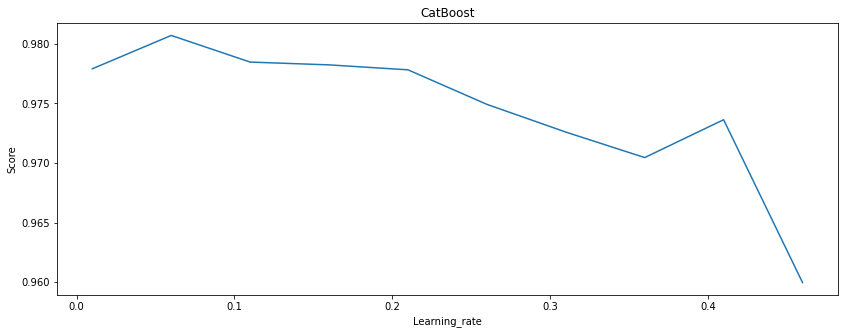

In [131]:
plot_graphic3(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

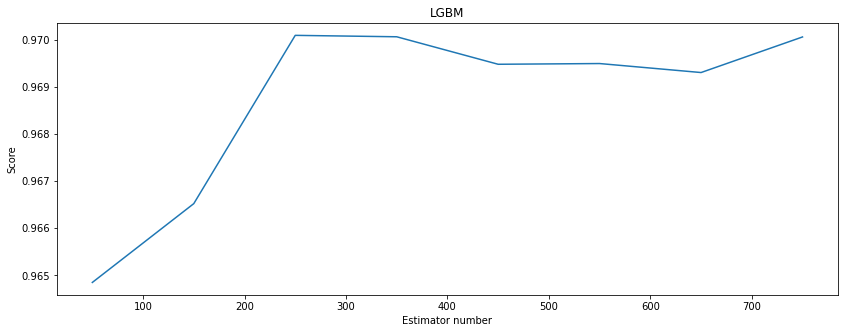

In [136]:
plot_graphic1(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

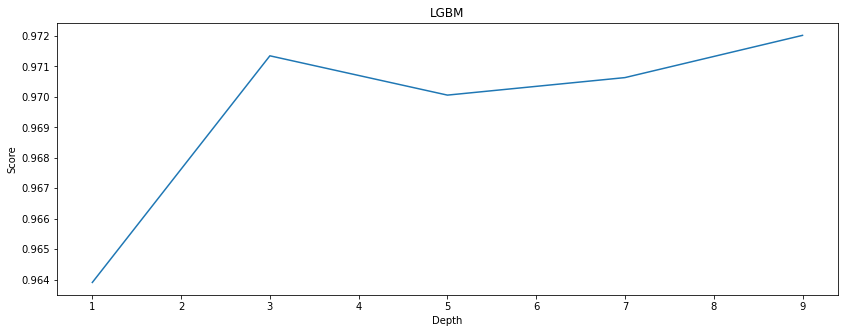

In [137]:
plot_graphic2(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

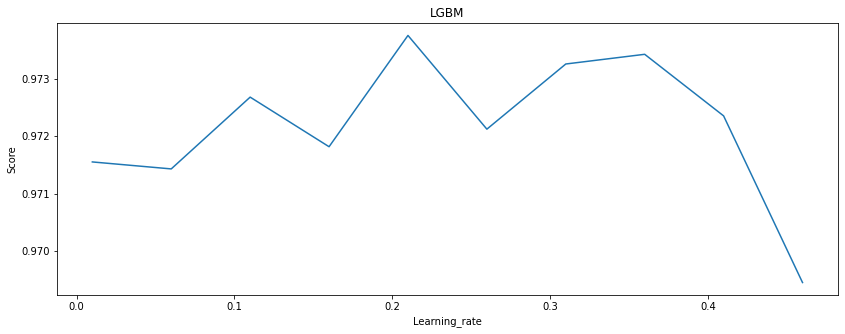

In [139]:
plot_graphic3(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

In [140]:
param['n_estimators'] = 750
param['max_depth'] = 3
param['learning_rate'] = 0.25

estimator = xgb.XGBClassifier(**param) 
estimator.fit(X_train, y_train)
xgbres = f1_score(estimator.predict(X_test), y_test)

In [141]:
param1['n_estimators'] = 750
param1['max_depth'] = 3
param1['learning_rate'] = 0.45

estimator = xgb.XGBClassifier(**param1) 
estimator.fit(X_train, y_train)
dartres = f1_score(estimator.predict(X_test), y_test)

In [142]:
param['n_estimators'] = 550
param['max_depth'] = 3
param['learning_rate'] = 0.05
estimator = yan.CatBoostClassifier(**param) 
estimator.fit(X_train, y_train)
catres = f1_score(estimator.predict(X_test), y_test)

0:	learn: 0.6515433	total: 2.86ms	remaining: 1.57s
1:	learn: 0.6135006	total: 6.26ms	remaining: 1.72s
2:	learn: 0.5716077	total: 9.85ms	remaining: 1.8s
3:	learn: 0.5383418	total: 15.7ms	remaining: 2.15s
4:	learn: 0.5118847	total: 20.9ms	remaining: 2.28s
5:	learn: 0.4890531	total: 26ms	remaining: 2.36s
6:	learn: 0.4632983	total: 30.3ms	remaining: 2.35s
7:	learn: 0.4440586	total: 33.6ms	remaining: 2.28s
8:	learn: 0.4245137	total: 37.2ms	remaining: 2.24s
9:	learn: 0.4088389	total: 41.2ms	remaining: 2.23s
10:	learn: 0.3934073	total: 48.5ms	remaining: 2.38s
11:	learn: 0.3796738	total: 52.1ms	remaining: 2.34s
12:	learn: 0.3666258	total: 56.1ms	remaining: 2.32s
13:	learn: 0.3567926	total: 60ms	remaining: 2.3s
14:	learn: 0.3477153	total: 63.7ms	remaining: 2.27s
15:	learn: 0.3381294	total: 67ms	remaining: 2.23s
16:	learn: 0.3293567	total: 70.7ms	remaining: 2.22s
17:	learn: 0.3205669	total: 74.6ms	remaining: 2.2s
18:	learn: 0.3134273	total: 79.1ms	remaining: 2.21s
19:	learn: 0.3055241	total: 83.

197:	learn: 0.0950532	total: 793ms	remaining: 1.41s
198:	learn: 0.0947207	total: 797ms	remaining: 1.41s
199:	learn: 0.0944776	total: 800ms	remaining: 1.4s
200:	learn: 0.0943318	total: 808ms	remaining: 1.4s
201:	learn: 0.0942344	total: 814ms	remaining: 1.4s
202:	learn: 0.0938368	total: 821ms	remaining: 1.4s
203:	learn: 0.0934517	total: 826ms	remaining: 1.4s
204:	learn: 0.0931617	total: 830ms	remaining: 1.4s
205:	learn: 0.0929033	total: 837ms	remaining: 1.4s
206:	learn: 0.0926942	total: 841ms	remaining: 1.39s
207:	learn: 0.0924056	total: 845ms	remaining: 1.39s
208:	learn: 0.0921011	total: 849ms	remaining: 1.38s
209:	learn: 0.0918459	total: 855ms	remaining: 1.38s
210:	learn: 0.0914901	total: 859ms	remaining: 1.38s
211:	learn: 0.0911704	total: 862ms	remaining: 1.37s
212:	learn: 0.0908183	total: 869ms	remaining: 1.37s
213:	learn: 0.0904651	total: 874ms	remaining: 1.37s
214:	learn: 0.0900481	total: 877ms	remaining: 1.37s
215:	learn: 0.0896892	total: 881ms	remaining: 1.36s
216:	learn: 0.08945

406:	learn: 0.0604414	total: 1.57s	remaining: 552ms
407:	learn: 0.0602644	total: 1.57s	remaining: 548ms
408:	learn: 0.0601073	total: 1.58s	remaining: 544ms
409:	learn: 0.0599956	total: 1.58s	remaining: 540ms
410:	learn: 0.0599037	total: 1.58s	remaining: 536ms
411:	learn: 0.0597626	total: 1.59s	remaining: 532ms
412:	learn: 0.0596750	total: 1.59s	remaining: 528ms
413:	learn: 0.0596080	total: 1.6s	remaining: 524ms
414:	learn: 0.0595499	total: 1.6s	remaining: 520ms
415:	learn: 0.0595115	total: 1.6s	remaining: 516ms
416:	learn: 0.0593910	total: 1.6s	remaining: 512ms
417:	learn: 0.0593396	total: 1.61s	remaining: 509ms
418:	learn: 0.0591799	total: 1.62s	remaining: 506ms
419:	learn: 0.0590562	total: 1.62s	remaining: 502ms
420:	learn: 0.0588637	total: 1.63s	remaining: 498ms
421:	learn: 0.0587500	total: 1.63s	remaining: 494ms
422:	learn: 0.0585855	total: 1.63s	remaining: 490ms
423:	learn: 0.0584923	total: 1.64s	remaining: 487ms
424:	learn: 0.0583750	total: 1.64s	remaining: 483ms
425:	learn: 0.05

In [143]:
param2['n_estimators'] = 750
param2['max_depth'] = 9
param2['learning_rate'] = 0.2
estimator = lgb.LGBMClassifier(**param) 
estimator.fit(X_train, y_train)
lgbres = f1_score(estimator.predict(X_test), y_test)

In [144]:
print('Neural netowork score: ', network_res)
print('SVM score: ', svm_res)
print('Log reg score: ',logreg_res)
print('Boosting score: ', boost_score)
print('Adaboost score: ',ada_score)
print('Ranfom forest score: ',rf_score)


Neural netowork score:  0.9605517909002904
SVM score:  0.9585241566148487
Log reg score:  0.935693215339233
Boosting score:  0.9728209934395501
Adaboost score:  0.960674839179512
Ranfom forest score:  0.9643517632804031


In [145]:
print('xgboost score: ', xgbres)
print('DART score: ', dartres)
print('catboost score: ',catres)
print('lightgbm score: ', lgbres)



xgboost score:  0.9744266415331448
DART score:  0.9741465863453815
catboost score:  0.9762699295513533
lightgbm score:  0.9740964983459209


Из всех бустингов катбуст показал лучший результат. Вообще, самый выскокий скор у SVM, видимо, данные хорошо разделяются.